<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbours alghoritm

##Import of libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##Upload and view on dataset

In [131]:
banking_raw = pd.read_csv('subscription_prediction.csv')
banking_df = banking_raw.copy()

In [132]:
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [133]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10122 entries, 0 to 10121
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10122 non-null  int64  
 1   job             10122 non-null  object 
 2   marital         10122 non-null  object 
 3   education       10122 non-null  object 
 4   default         10122 non-null  object 
 5   housing         10122 non-null  object 
 6   loan            10122 non-null  object 
 7   contact         10122 non-null  object 
 8   month           10122 non-null  object 
 9   day_of_week     10122 non-null  object 
 10  duration        10122 non-null  int64  
 11  campaign        10122 non-null  int64  
 12  pdays           10122 non-null  int64  
 13  previous        10122 non-null  int64  
 14  poutcome        10122 non-null  object 
 15  emp.var.rate    10122 non-null  float64
 16  cons.price.idx  10122 non-null  float64
 17  cons.conf.idx   10122 non-null 

In [134]:
banking_df.describe(include='number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000
mean,40.313673,373.414049,2.369789,896.476882,0.297471,-0.432671,93.492407,-40.250573,3.035134,5138.838975
std,11.855014,353.277755,2.472392,302.175859,0.680535,1.714657,0.628615,5.271326,1.884191,85.859595
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,140.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-42.700000,1.252000,5076.200000
50%,38.000000,252.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,498.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [135]:
banking_df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Text(0.5, 1.0, 'Target distribution')

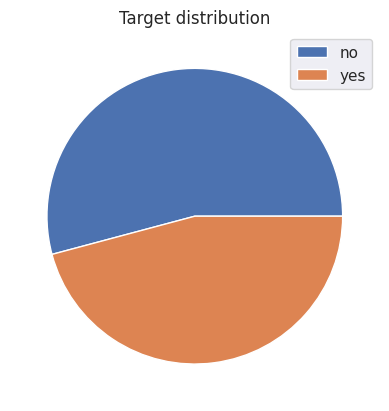

In [136]:
y = banking_df['y'].value_counts()

sns.set_theme()

plt.pie(y)
plt.legend(y.index)
plt.title('Target distribution')

##Preparing the dataset

In [137]:
banking_df['y'] = banking_df['y'].map({'yes' : 1, 'no' : 0})

In [138]:
train_df = banking_df.sample(frac=0.85, random_state=417)
test_df = banking_df.drop(train_df.index)

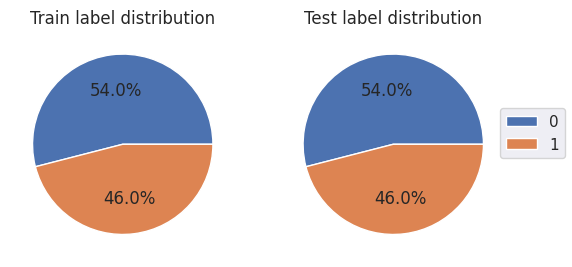

In [139]:
train_label = train_df['y'].value_counts()
test_label = train_df['y'].value_counts()

fig, axes = plt.subplots(1, 2)

axes[0].pie(train_label.values, autopct='%1.1f%%')
axes[0].set_title('Train label distribution')

axes[1].pie(test_label.values, autopct='%1.1f%%')
axes[1].set_title('Test label distribution')

fig.legend(train_label.index, loc='center right')

plt.show()

In [140]:
X_train = train_df.drop('y', axis=1)
y_train = train_df['y']
X_test = test_df.drop('y', axis=1)
y_test = test_df['y']

##Making the KNN alghoritm

In [28]:
knn('age', X_test.iloc[108], 3)

np.int64(0)

In [29]:
y_test.iloc[108]

np.int64(0)

In [30]:
y_pred_age = X_test.apply(lambda x: knn('age', x, 3), axis=1)

In [31]:
accuracy_age = (y_pred_age == y_test).sum() / len(y_pred_age)
accuracy_age

np.float64(0.538866930171278)

In [32]:
(y_pred_age == y_test).value_counts(normalize=True)[True]

np.float64(0.538866930171278)

In [33]:
y_pred_campaign = X_test.apply(lambda x: knn('campaign', x, 3), axis=1)

In [34]:
accuracy_campaign = (y_pred_campaign == y_test).sum() / len(y_pred_campaign)
accuracy_campaign

np.float64(0.5513833992094862)

In [36]:
banking_df_copy = banking_raw.copy()

In [41]:
pd.get_dummies(data=banking_df_copy, columns=['marital'], drop_first=True)

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single,marital_unknown
0,40,admin.,basic.6y,no,no,no,telephone,may,mon,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False
1,56,services,high.school,no,no,yes,telephone,may,mon,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False
2,41,blue-collar,unknown,unknown,no,no,telephone,may,mon,217,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False
3,57,housemaid,basic.4y,no,yes,no,telephone,may,mon,293,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False
4,39,management,basic.9y,unknown,no,no,telephone,may,mon,195,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,64,retired,professional.course,no,yes,no,cellular,nov,fri,151,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,False,False,False
10118,37,admin.,university.degree,no,yes,no,cellular,nov,fri,281,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,True,False,False
10119,73,retired,professional.course,no,yes,no,cellular,nov,fri,334,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,True,False,False
10120,44,technician,professional.course,no,no,no,cellular,nov,fri,442,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,True,False,False


In [118]:
knn(["age", "campaign", "marital_married", "marital_single"], X_test_c.iloc[108], 3)

np.int64(1)

In [91]:
y_pred = X_test_c.apply(lambda x: knn(["age", "campaign", "marital_married", "marital_single"], x, 3), axis=1)

In [93]:
(y_pred == y_test).value_counts(normalize=True)[True]

np.float64(0.5546772068511199)

In [108]:
X_test['age'].dtype

dtype('int64')

In [168]:
def knn(features, row, k):
  distance = (((X_train_c[features] - row[features])**2).sum(axis=1)**0.5).astype(float)
  neighbours = distance.nsmallest(k).index
  return y_train[neighbours].mode()[0]

In [169]:
X_train_c = X_train.copy()
X_test_c = X_test.copy()

In [170]:
X_train_c = pd.get_dummies(data=X_train_c, columns=['marital'],
                           drop_first=True, dtype=int)
X_test_c = pd.get_dummies(data=X_test_c, columns=['marital'],
                          drop_first=True, dtype=int)

In [171]:
X_train_c[['age', 'campaign']] = (
    X_train[['age', 'campaign']] - X_train[['age', 'campaign']].min()) \
/ (X_train[['age', 'campaign']].max() - X_train[['age', 'campaign']].min())

X_test_c[['age', 'campaign']] = (
    X_test[['age', 'campaign']] - X_train[['age', 'campaign']].min()) \
/ (X_train[['age', 'campaign']].max() - X_train[['age', 'campaign']].min())

In [172]:
y_pred = X_test_c.apply(lambda x: knn(["age", "campaign", "marital_married", "marital_single"], x, 3), axis=1)

In [167]:
(y_pred == y_test).value_counts(normalize=True)[True]

np.float64(0.5513833992094862)